# Playing with videoTools
I recommend executing "Paths, parameters, and modules" and then only
 the cells with operations that you want to play with.

## Paths, parameters, and modules
Modify vid_path to the video that you want to work with.

In [8]:
from sources import videoTools as vt
import cv2 as cv
import os
from matplotlib import pyplot as plt

# name of source video and paths
video = 'zebrafish_larva'
vid_path = '..' + os.path.sep + 'kineKit_files' + os.path.sep + video + '.mov'
out_path = '..' + os.path.sep + 'kineKit_files' + os.path.sep + video + '_out.mov'


## Reading a video frame

[ WARN:0] global ../modules/videoio/src/cap_gstreamer.cpp (616) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created
[ERROR:0] global ../modules/videoio/src/cap.cpp (166) open VIDEOIO(GSTREAMER): raised OpenCV exception:

OpenCV(4.5.4) ../modules/core/src/utils/filesystem.cpp:580: error: (-213:The function/feature is not implemented)  in function 'exists'




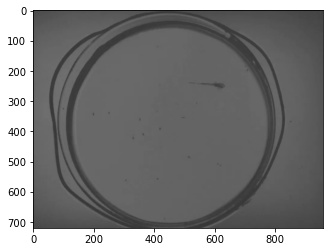

In [9]:
# Read first video frame
im = vt.getFrame(vid_path,1)

# Display frame
plt.imshow(im)
plt.show()


## Select a region of interest

ROI is: (1024, 81, 1978, 1976)


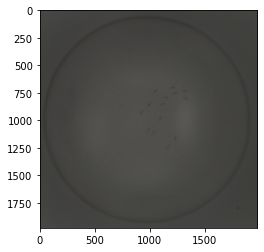

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


<Figure size 432x288 with 0 Axes>

In [2]:
# Select roi from first frame of video
r = vt.findROI(vid_path)
print("ROI is: " + str(r))

# Read first video frame
im = vt.getFrame(vid_path,1)

# Crop frame
im_cropped = im[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

# Display results
# fig = plt.figure()
plt.imshow(im_cropped)
plt.show()
plt.waitforbuttonpress(1)
# plt.close(fig)

## Trim duration of video

In [4]:
# Specify start and ending times
tEnd   = "00:02"
tStart = "00:01"

# Run code to trim
vt.trimDur(vid_path,out_path,tEnd,tStart)


## Select roi and output cropped video

In [2]:
# Select roi from first frame of video
r = vt.findROI(vid_path)

# Output cropped
vt.convertCropped(vid_path,out_path,r)


## Select roi and trim duration


In [2]:
# Specify start and ending times
tEnd   = "00:02"
tStart = "00:01"

# Select roi from first frame of video
r = vt.findROI(vid_path)

# Run crop and trim movie export
vt.trimDurCropped(vid_path, out_path, r, tEnd, tStart)

## Estimate background 

In [ ]:
# Set max number of frames to use
max_frames = 600

# Run background estimator
bgImage = vt.getbackground(vid_path, out_path + '-bgImg.png', max_frames)

# View computed background image
cv.imshow("bg Model", bgImage)
cv.waitKey(60)
cv.destroyAllWindows()

# plt.imshow(bgImage)
# plt.show()

Background image complete



## Background subtraction

In [ ]:
    
# Get ROI (bounding box centered on initial click position)
roi = vt.findROI(vid_path)

# Call background subtraction function (no output in notebook)
vt.bgsubtract(vid_path, out_path, roi)

Background subtraction complete
